# 
<h1 style="
    background-color:#2f632a;
    color:#fff;
    padding:20px;
    border-radius:8px;
    text-align:center;
    font-family:Consolas, 'Courier New', monospace;
">
Spotify - Bagging
</h1>

<div style="background-color:#f4faf2; font-family:Consolas; padding:10px; border-radius:8px;">

| **Step to be Executed**                                          |
| ---------------------------------------------- | 
| Data Processing                        | 
| Data Split                            | 
| Model Training                             | 
| SMOTE                        | 
| Hyperparameter Tuning| 
| Evaluation of the Tuned Model |                     
| Model Performance Comparison  
| Final Model Performance Metrics  

 </div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
1. Data Processing
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The data set spotify_clean_ABT.xlsx is loaded, previously worked on in the EDA.
</div>

In [95]:
import pandas as pd

# Read the dataset
df_final_ABT = pd.read_excel("spotify_clean_ABT.xlsx")

# Quick preview
print("File loaded successfully with shape:", df_final_ABT.shape)
df_final_ABT.sample(5)


File loaded successfully with shape: (2085, 23)


,artist_popularity,danceability,energy,key,loudness,mode,liveness,valence,tempo,artist_name_encoded,...,dance_energy_ratio,valence_energy,duration_min,instrumentalness_log,acousticness_log,speechiness_log,artist_song_count,artist_avg_popularity,decade,is_modern
145,88,0.884,0.347,8,91,0,0.0871,0.376,75.016,3,...,2.547543,0.130472,3.671783,0.000007,0.014889,0.300105,2,80.500000,2010,1
1261,63,0.545,0.953,7,71,1,0.2810,0.558,140.002,750,...,0.571878,0.531774,3.600450,0.110647,0.000941,0.043155,1,62.000000,2000,0
1781,84,0.725,0.874,0,56,0,0.0958,0.748,127.985,122,...,0.829519,0.653752,4.132217,0.000412,0.002617,0.038836,21,74.619048,2010,0
1256,57,0.758,0.768,6,74,1,0.1410,0.824,83.033,124,...,0.986978,0.632832,3.411783,0.000000,0.023424,0.160417,2,67.000000,2000,0
679,73,0.482,0.873,0,49,1,0.4090,0.737,165.084,65,...,0.552118,0.643401,3.572000,0.000000,0.011039,0.081856,11,71.363636,2010,0


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
2. Data Split
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
In this step, the dataset is divided into two parts:

Predictors (X): All columns except popularity_class, which will be used as input features for the model.

Target variable (y): popularity_class

The distribution of y is printed to check for class imbalance (whether all popularity categories are equally represented).
</div>

In [96]:
# Define predictors (X) and target (y)
X = df_final_ABT.drop(columns=['popularity_class'])
y = df_final_ABT['popularity_class']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True) * 100)


Features shape: (2085, 22)
Target distribution:
popularity_class
High      76.115108
Medium    22.206235
Low        1.678657
Name: proportion, dtype: float64


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The dataset is split into 80% training and 20% testing sets.
stratify=y keeps class proportions consistent, and random_state=42 ensures reproducibility.
</div>

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")


Training size: 1668
Testing size: 417


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
3. Model Training
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The model is trained to predict popularity classes. It uses 10 decision trees (n_estimators=10) with class balancing.

The model is fitted on training data and used to predict both training and test sets for evaluation.
</div>

In [98]:
from sklearn.ensemble import RandomForestClassifier

# Create and train model
dt_model = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=10,max_features=None)
dt_model.fit(X_train, y_train)

y_pred_train = dt_model.predict(X_train)
# Predictions
y_pred = dt_model.predict(X_test)


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section evaluates how well the Bagging model performs with the following methods:

. Accuracy and Balanced Accuracy.

. Classification report.

. Confusion matrix.

. Feature importance analysis
</div>

Balanced Accuracy for train data: 0.971
Accuracy for train data: 0.987
Balanced Accuracy for test data: 0.588
Accuracy for test data: 0.856

Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.97      0.91       317
         Low       0.40      0.29      0.33         7
      Medium       0.85      0.51      0.64        93

    accuracy                           0.86       417
   macro avg       0.71      0.59      0.63       417
weighted avg       0.85      0.86      0.84       417



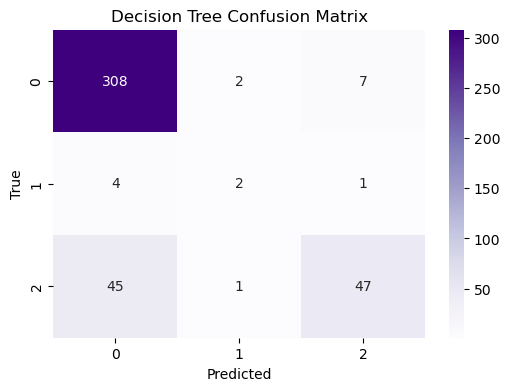

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy for train data:", round(balanced_accuracy_score(y_train, y_pred_train), 3))
print("Accuracy for train data:", round(accuracy_score(y_train, y_pred_train), 3))
print("Balanced Accuracy for test data:", round(balanced_accuracy_score(y_test, y_pred), 3))
print("Accuracy for test data:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()


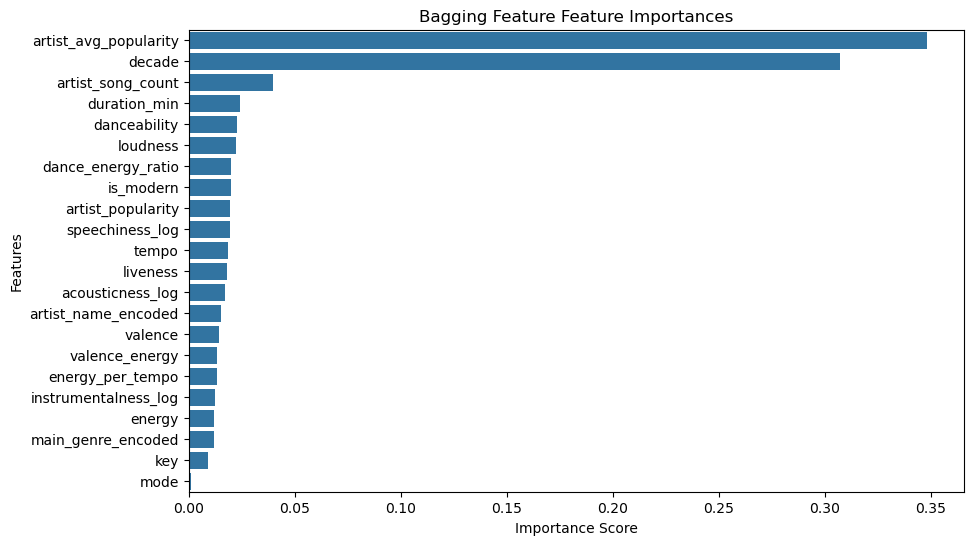

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Bagging Feature Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
4. SMOTE (Synthetic Minority Oversampling Technique)
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This step applies SMOTE to address class imbalance in the training data.

The resulting balanced dataset (X_train_res, y_train_res) ensures the model trains fairly across all classes, improving prediction performance on the underrepresented groups.
</div>

In [101]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ========================================
# Apply SMOTE to balance the training set
# ========================================
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({'High': 1270, 'Medium': 370, 'Low': 28})
After SMOTE: Counter({'Medium': 1270, 'High': 1270, 'Low': 1270})


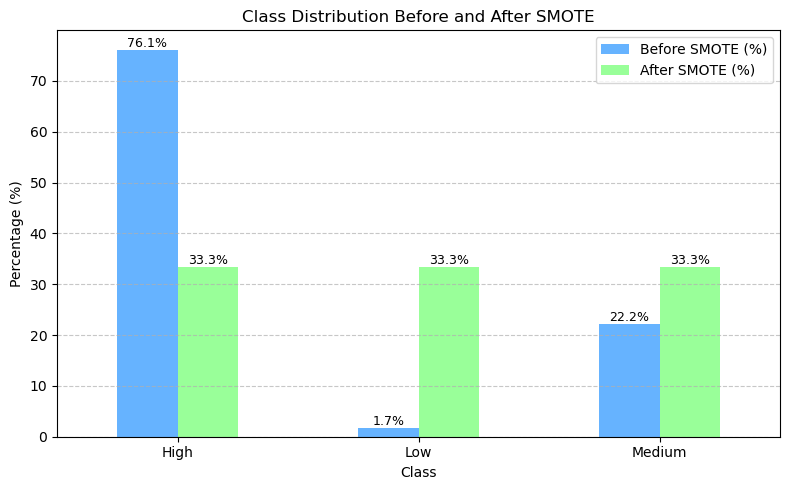

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate counts and percentages
before_counts = pd.Series(y_train).value_counts().sort_index()
after_counts  = pd.Series(y_train_res).value_counts().sort_index()

before_perc = before_counts / before_counts.sum() * 100
after_perc  = after_counts / after_counts.sum() * 100

# Combine for plotting
dist_df = pd.DataFrame({
    'Before SMOTE (%)': before_perc,
    'After SMOTE (%)': after_perc
})

# Plot
ax = dist_df.plot(kind='bar', figsize=(8,5), color=['#66b3ff','#99ff99'])
plt.title("Class Distribution Before and After SMOTE")
plt.ylabel("Percentage (%)")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with both % and counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=9, color='black')
    
plt.legend()
plt.tight_layout()
plt.show()

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
5. Hyperparameter Tuning
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This step prepares for hyperparameter optimization using GridSearchCV to improve the model’s performance.
</div>

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define base model
dt_base = RandomForestClassifier(random_state=42,class_weight='balanced')

# Define parameter grid for tuning
param_grid = {
    
    'max_depth': [15,20,25],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10],
    'n_estimators': [30, 50, 80],
    'max_features': [None]
   }


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
Grid Search is ran using 5-fold cross-validation to find the best Random Forest parameters for maximum accuracy.
</div>

In [104]:
import time 
start = time.time()

grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # use all CPU cores
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)

print("Best Parameters Found:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Accuracy:", round(grid_search.best_score_, 4))

end = time.time()
print(f"Training time: {end - start:.2f} seconds")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters Found:
{'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}

Best Cross-Validation Accuracy: 0.916
Training time: 141.63 seconds


In [105]:
best_dt = grid_search.best_estimator_

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
6. Evaluation of the Tuned Model
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section evaluates the tuned model using the best parameters found in Grid Search.

. Accuracy and balanced accuracy are calculated to assess performance and check for overfitting.

. Classification report summarizes precision, recall, and F1-scores for each class.

. Confusion matrix heatmap visualizes how well the tuned model distinguishes between classes.

. Feature importance Analysis to identify which features influence the model the most.
</div>

Test Accuracy: 0.837

Classification Report:
               precision    recall  f1-score   support

        High       0.91      0.89      0.90       317
         Low       0.33      0.71      0.45         7
      Medium       0.68      0.66      0.67        93

    accuracy                           0.84       417
   macro avg       0.64      0.75      0.67       417
weighted avg       0.85      0.84      0.84       417

Balanced Accuracy for train data: 0.972
Accuracy for train data: 0.972
Balanced Accuracy for test data: 0.754
Accuracy for test data: 0.837


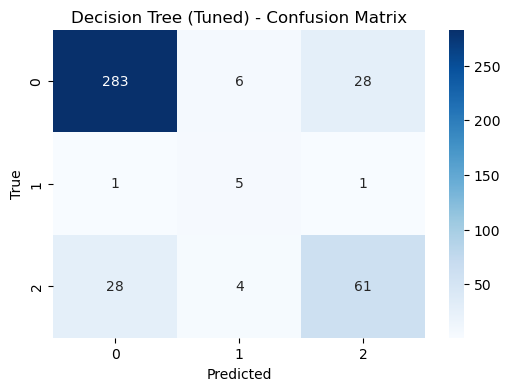

In [106]:
# 1️ Make predictions with your tuned Decision Tree model

y_pred_best = best_dt.predict(X_test)
y_train_best = best_dt.predict(X_train_res)

# 2️ Evaluate tuned Decision Tree model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Test Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

print("Balanced Accuracy for train data:", round(balanced_accuracy_score(y_train_res, y_train_best), 3))
print("Accuracy for train data:", round(accuracy_score(y_train_res, y_train_best), 3))

print("Balanced Accuracy for test data:", round(balanced_accuracy_score(y_test, y_pred_best), 3))
print("Accuracy for test data:", round(accuracy_score(y_test, y_pred_best), 3))


# 3️ Confusion Matrix visualization

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree (Tuned) - Confusion Matrix')
plt.show()

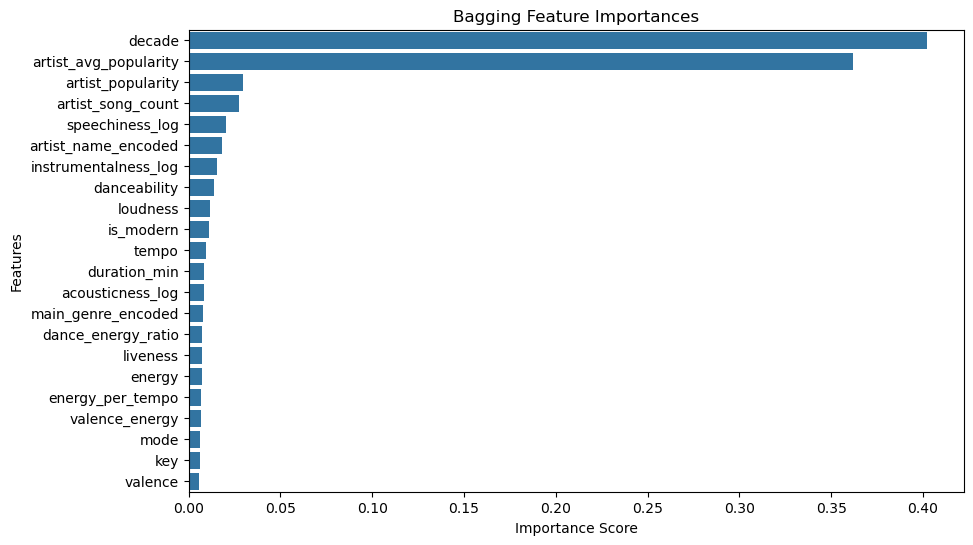

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Bagging Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
TThis step evaluates the tuned model’s ability to distinguish between classes using ROC and AUC metrics.
</div>

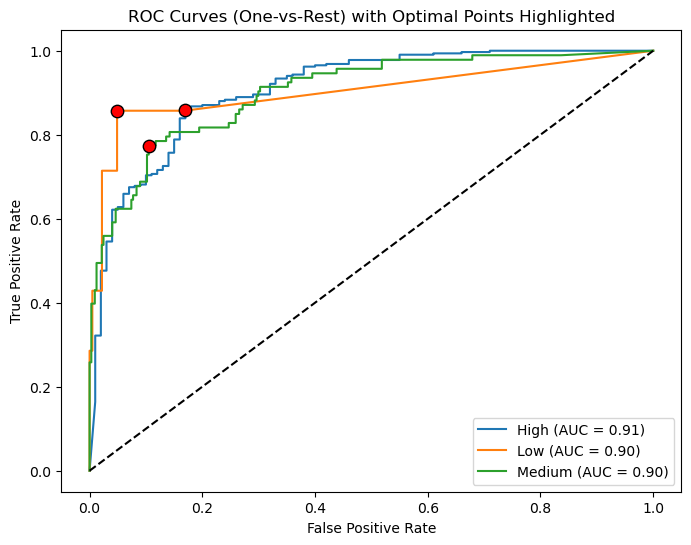

Class order used: ['High' 'Low' 'Medium']
Optimal thresholds: {'High': 0.6195221445221447, 'Low': 0.06778138528138529, 'Medium': 0.42007907479946943}


In [108]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


model_classes = best_dt.classes_  
y_pred_proba = best_dt.predict_proba(X_test)


y_test_bin = label_binarize(y_test, classes=model_classes)


fpr, tpr, thresholds_dict, roc_auc, optimal_thresholds = {}, {}, {}, {}, {}

for i, cls in enumerate(model_classes):
    fpr[cls], tpr[cls], thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    thresholds_dict[cls] = thresholds
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

    j_scores = tpr[cls] - fpr[cls]
    best_idx = np.argmax(j_scores)
    optimal_thresholds[cls] = thresholds[best_idx]

# ROC curves Plot
plt.figure(figsize=(8, 6))
for cls in model_classes:
    plt.plot(fpr[cls], tpr[cls], label=f"{cls} (AUC = {roc_auc[cls]:.2f})")
    best_idx = np.argmax(tpr[cls] - fpr[cls])
    plt.scatter(
        fpr[cls][best_idx],
        tpr[cls][best_idx],
        color="red",
        s=80,
        edgecolor="black",
        zorder=5,
    )

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves (One-vs-Rest) with Optimal Points Highlighted")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("Class order used:", model_classes)
print("Optimal thresholds:", optimal_thresholds)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
7. Model Performance Comparison
</h2>

In [109]:
print("Base Model Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Tuned Model Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))

Base Model Accuracy: 0.856
Tuned Model Accuracy: 0.837


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
8. Final Model Performance Metrics
</h2>

In [110]:
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score, classification_report
)

# Compute all key metrics
acc = accuracy_score(y_test, y_pred_best)
bal_acc = balanced_accuracy_score(y_test, y_pred_best)
macro_f1 = f1_score(y_test, y_pred_best, average='macro')
weighted_f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy for tuned model: {acc:.3f}")
print(f"Balanced Accuracy tuned model: {bal_acc:.3f}")
print(f"Macro F1-score tuned model: {macro_f1:.3f}")
print(f"Weighted F1-score tuned model: {weighted_f1:.3f}")

# Detailed report per class
print("\nClassification Report for tuned model:")
print(classification_report(y_test, y_pred_best))


Accuracy for tuned model: 0.837
Balanced Accuracy tuned model: 0.754
Macro F1-score tuned model: 0.674
Weighted F1-score tuned model: 0.840

Classification Report for tuned model:
              precision    recall  f1-score   support

        High       0.91      0.89      0.90       317
         Low       0.33      0.71      0.45         7
      Medium       0.68      0.66      0.67        93

    accuracy                           0.84       417
   macro avg       0.64      0.75      0.67       417
weighted avg       0.85      0.84      0.84       417

